In [ ]:
!pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 32.9 MB 1.5 MB/s 


In [ ]:
from google.colab import files
uploaded = files.upload()

#Joint Visualisation

istockphoto-1188342987-612x612.jpg


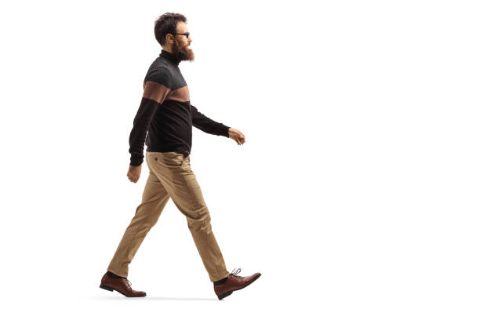

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import math
import numpy as np

DESIRED_HEIGHT = 480
DESIRED_WIDTH = 480
def resize_and_show(image):
  h, w = image.shape[:2]
  if h < w:
    img = cv2.resize(image, (DESIRED_WIDTH, math.floor(h/(w/DESIRED_WIDTH))))
  else:
    img = cv2.resize(image, (math.floor(w/(h/DESIRED_HEIGHT)), DESIRED_HEIGHT))
  cv2_imshow(img)

# Read images with OpenCV.
images = {name: cv2.imread(name) for name in uploaded.keys()}
# Preview the images.
for name, image in images.items():
  print(name)   
  resize_and_show(image)

In [ ]:
import mediapipe as mp
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils 
mp_drawing_styles = mp.solutions.drawing_styles

In [ ]:
# Run MediaPipe Pose and draw pose landmarks.
with mp_pose.Pose(
    static_image_mode=True, min_detection_confidence=0.5, model_complexity=2) as pose:
  for name, image in images.items():
    # Convert the BGR image to RGB and process it with MediaPipe Pose.
    results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    
    # Print nose landmark.
    image_hight, image_width, _ = image.shape
    if not results.pose_landmarks:
      continue
    print(
      f'Nose coordinates: ('
      f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].x * image_width}, '
      f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].y * image_hight})'
    )

    # Draw pose landmarks.
    print(f'Pose landmarks of {name}:')
    annotated_image = image.copy()
    mp_drawing.draw_landmarks(
        annotated_image,
        results.pose_landmarks,
        mp_pose.POSE_CONNECTIONS)
    resize_and_show(annotated_image)

#Step Length

In [ ]:
import cv2
import time
import math as m
import mediapipe as mp

In [ ]:
# Initilize medipipe selfie segmentation class.
mp_pose = mp.solutions.pose
mp_holistic = mp.solutions.holistic

In [ ]:
# Font type.
font = cv2.FONT_HERSHEY_SIMPLEX

# Colors.
blue = (255, 127, 0)
red = (50, 50, 255)
green = (127, 255, 0)
dark_blue = (127, 20, 0)
light_green = (127, 233, 100)
yellow = (0, 255, 255)
pink = (255, 0, 255)

In [ ]:
# Initialize mediapipe pose class.
pose = mp_pose.Pose()

# For webcam input replace file name with 0.
file_name = '/content/videoplayback.mp4'
cap = cv2.VideoCapture(file_name)

# Meta.
fps = cap.get(cv2.CAP_PROP_FPS)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
frame_size = (width, height)
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print( length )

# Initialize video writer.
video_output = cv2.VideoWriter('/content/output.mp4', fourcc, fps, frame_size)

1540


In [ ]:
print(fps)

23.976023976023978


In [ ]:
i=0
curr_l =0
curr_r = 0
flag = 0
flag_l=1
flag_y = 0
start_x = 0
end_x = 0
count = 0
t =1
print('Processing..')
while cap.isOpened():
    # Capture frames.
    success, image = cap.read()
    print("Frame",i)
    if not success:
        print("Null.Frames")
        break
    if i>119 and i<310:
      # Get fps.
      fps = cap.get(cv2.CAP_PROP_FPS)
      # Get height and width.
      h, w = image.shape[:2]

      # Convert the BGR image to RGB.
      image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

      # Process the image.
      keypoints = pose.process(image)

      # Convert the image back to BGR.
      image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

      # Use lm and lmPose as representative of the following methods.
      lm = keypoints.pose_landmarks
      lmPose = mp_pose.PoseLandmark

      # Acquire the landmark coordinates.
      # Once aligned properly, left or right should not be a concern.      
     # Left ankle.
      try:
        l_an_x = int(lm.landmark[lmPose.LEFT_ANKLE].x * w)
        l_an_y = int(lm.landmark[lmPose.LEFT_ANKLE].y * h)
        # Right ankle.
        r_an_x = int(lm.landmark[lmPose.RIGHT_ANKLE].x * w)
        r_an_y = int(lm.landmark[lmPose.RIGHT_ANKLE].y * h)
      
      except:
        i+=1
        print("Error")
        continue

      if t:
        start_t = i
        t=0

      if flag_l:

        if flag:
          if abs(l_an_y-curr_l)>2:
            curr_l = l_an_y
            curr_r = r_an_y
            i+=1
            print("Left moving")
            continue
          else:
            if flag_y:
              if abs(r_an_y - curr_r)>2 :
                curr_l = l_an_y
                curr_r = r_an_y
                i+=1
                print("RIght moving")
                continue
              elif r_an_x< start_x:
                end_x = r_an_x
                print("Step Length",start_x - end_x)
                count+=1 
                print("Cadence",count*60/((i-start_t)/fps))      
                flag_l=0      
                curr_l =0
                curr_r = 0
                flag = 0
                flag_y = 0
                start_x = 0
                end_x = 0
              else:
                curr_l = l_an_y
                curr_r = r_an_y
                i+=1
                print("RIght moving")
                continue
            else:
              start_x = l_an_x
              flag_y = 1
              print("Left stationary")
        else:
          curr_l = l_an_y
          curr_r = r_an_y
          flag=1
          print("First Frame")

      else:
        if flag:
          if abs(r_an_y-curr_r)>5:
            curr_l = l_an_y
            curr_r = r_an_y
            i+=1
            print("Right moving")
            continue
          else:
            if flag_y:
              if abs(l_an_y - curr_l)>5:
                curr_l = l_an_y
                curr_r = r_an_y
                i+=1
                print("Left moving")
                continue
              elif l_an_x< start_x:
                end_x = l_an_x
                print("Step Length",start_x - end_x)
                count+=1 
                print("Cadence",count*60/((i-start_t)/fps))
                flag_l=1   
                curr_l =0
                curr_r = 0
                flag = 0
                flag_y = 0
                start_x = 0
                end_x = 0 
              else:
                curr_l = l_an_y
                curr_r = r_an_y
                i+=1
                print("Left moving") 
                continue         
            else:
              start_x = r_an_x
              flag_y = 1
              start_time = i
              print("Right stationary")
        else:
          curr_l = l_an_y
          curr_r = r_an_y
          flag=1
          print("First Frame")

      print(l_an_x,l_an_y,r_an_x,r_an_y)



      # print(curr_l,curr_r)
      i+=1
    else:
      i+=1
print('Finished.')
cap.release()
video_output.release()